### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [ ]:
# note: the path will need to be adjusted to your local environment
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
data.isna().any()

destination             False
passanger               False
weather                 False
temperature             False
time                    False
coupon                  False
expiration              False
gender                  False
age                     False
maritalStatus           False
has_children            False
education               False
occupation              False
income                  False
car                      True
Bar                      True
CoffeeHouse              True
CarryAway                True
RestaurantLessThan20     True
Restaurant20To50         True
toCoupon_GEQ5min        False
toCoupon_GEQ15min       False
toCoupon_GEQ25min       False
direction_same          False
direction_opp           False
Y                       False
dtype: bool

3. Decide what to do about your missing data -- drop, replace, other...

In [5]:
# drop column car
data.drop(columns=['car'], inplace=True)

# fill in missing values
data.fillna(value={'Bar': 'never', 'CoffeeHouse': 'never', 'CarryAway': 'never', 'RestaurantLessThan20': 0, 'Restaurant20To50': 0}, inplace=True)

# all of the data is fixed
data.isna().any()

destination             False
passanger               False
weather                 False
temperature             False
time                    False
coupon                  False
expiration              False
gender                  False
age                     False
maritalStatus           False
has_children            False
education               False
occupation              False
income                  False
Bar                     False
CoffeeHouse             False
CarryAway               False
RestaurantLessThan20    False
Restaurant20To50        False
toCoupon_GEQ5min        False
toCoupon_GEQ15min       False
toCoupon_GEQ25min       False
direction_same          False
direction_opp           False
Y                       False
dtype: bool

4. What proportion of the total observations chose to accept the coupon?



In [6]:
data['Y'].mean()

0.5684326710816777

5. Use a bar plot to visualize the `coupon` column.

<Axes: ylabel='coupon'>

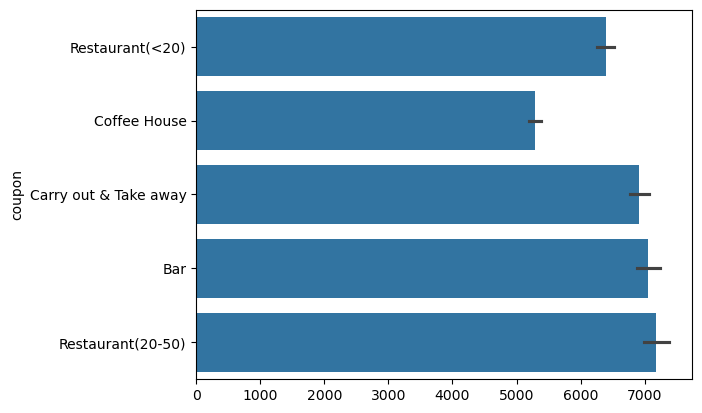

In [7]:
sns.barplot(data=data['coupon'])

6. Use a histogram to visualize the temperature column.

<Axes: xlabel='temperature', ylabel='Count'>

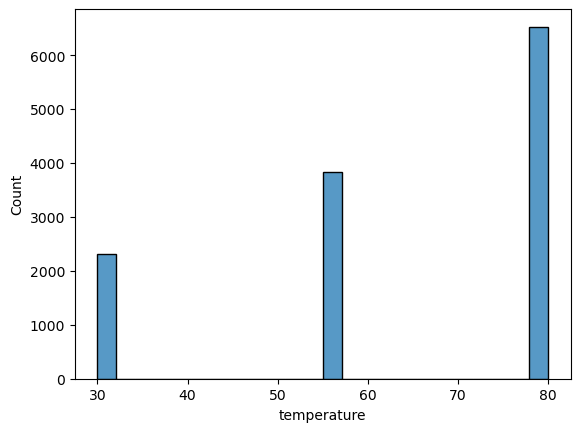

In [8]:
sns.histplot(data['temperature'])

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [10]:
bar = data[ data['coupon'] == "Bar" ]

2. What proportion of bar coupons were accepted?


In [14]:
bar['Y'].mean()

0.41001487357461575

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [11]:
bar.Bar.value_counts()
bar[ (bar['Bar'] == 'never') | (bar['Bar'] == 'less1') | (bar['Bar'] == '1~3') ].Y.value_counts(normalize=True) # 37%
bar[ (bar['Bar'] == '4~8') | (bar['Bar'] == 'gt8') ].Y.value_counts(normalize=True) #77%

Y
1    0.768844
0    0.231156
Name: proportion, dtype: float64

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [12]:
bar.age.value_counts(normalize=True)
over_25 = [ '26', '31', '36', '41', '46', '50plus' ]
gt_1x_per_month = [ '1~3', '4~8', 'gt8' ]
bar[ (bar.Bar.isin(gt_1x_per_month)) | (bar.age.isin(over_25)) ].Y.value_counts(normalize=True)   #59%
bar[ (~bar.Bar.isin(gt_1x_per_month)) & (~bar.age.isin(over_25)) ].Y.value_counts(normalize=True) #39%

# Yes, first group is 59% while all others are 39%

Y
0    0.606707
1    0.393293
Name: proportion, dtype: float64

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [13]:
bar[ (bar.Bar.isin(gt_1x_per_month)) & (bar.passanger != 'Kid(s)') & (bar.occupation != 'Farming Fishing & Forestry' ) ].Y.value_counts(normalize=True) # 71%

# 71% acceptance rate

Y
1    0.713249
0    0.286751
Name: proportion, dtype: float64

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [14]:
bar[ (bar.Bar.isin(gt_1x_per_month)) & (bar.passanger != 'Kid(s)') & (bar.maritalStatus != 'Divorced' ) ].Y.value_counts(normalize=True) # 0.710037
bar[ (bar.Bar.isin(gt_1x_per_month)) & ( bar.age.isin(['below21', '21', '26']) ) ].Y.value_counts(normalize=True) # 0.721739
income_lt_50k = [ 'Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999' ]
bar[ (bar.RestaurantLessThan20.isin(['4~8', 'gt8'])) & ( bar.income.isin(income_lt_50k) ) ].Y.value_counts(normalize=True) # 0.546512

Y
0    0.546512
1    0.453488
Name: proportion, dtype: float64

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [15]:
bar.groupby('Bar').mean('Y').sort_values('Y')               # People who drink more frequently were MORE inclined to accept the coupon
bar.groupby('passanger').mean('Y').sort_values('Y')         # People who had kids in the car were LESS inclined to accept the coupon
bar.groupby('income').mean('Y').sort_values('Y')            # n/a
bar.groupby('maritalStatus').mean('Y').sort_values('Y')     # People who are divorced are LESS inclined to accept the coupon
bar.groupby('age').mean('Y').sort_values('Y')               # People who are drinking age (21-26) were MORE inclined to accept the coupo

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
age,,,,,,,,
50plus,58.356890,0.720848,1.0,0.667845,0.240283,0.229682,0.770318,0.296820
36,56.555024,0.636364,1.0,0.708134,0.234450,0.196172,0.803828,0.301435
46,57.064220,0.577982,1.0,0.642202,0.275229,0.238532,0.761468,0.348624
31,55.737463,0.483776,1.0,0.690265,0.262537,0.188791,0.811209,0.368732
below21,55.862069,0.045977,1.0,0.724138,0.287356,0.183908,0.816092,0.413793
41,58.089888,0.797753,1.0,0.685393,0.235955,0.202247,0.797753,0.432584
26,58.481013,0.248101,1.0,0.627848,0.245570,0.220253,0.779747,0.488608
21,58.537170,0.160671,1.0,0.633094,0.263789,0.208633,0.791367,0.505995


## Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

### Creating numerical values for the categorical variables

In [16]:
# create scoring metrics to allow for numerical comparison
data["dest_score"] = data["destination"].map({
    "Work": 0,
    "Home": 1,
    "No Urgent Place": 2
})
data["weather_score"] = data["weather"].map({
    "Snowy": 0,
    "Rainy": 1,
    "Sunny": 2
})
data["temp_score"] = data["temperature"].map({
    "30": 0,
    "55": 1,
    "80": 2
})
data["time_score"] = data["time"].map({
    "7AM": 0,
    "10AM": 1,
    "2PM": 2,
    "6PM": 3,
    "10PM": 4
})
data["expiry_score"] = data["expiration"].map({
    "2h": 0,
    "1d": 1
})
data["gender_score"] = data["gender"].map({
    "Female": 0,
    "Male": 1
})
data["age_score"] = data["age"].map({
    "below21": 0,
    "21": 1,
    "26": 2,
    "31": 3,
    "36": 4,
    "41": 5,
    "46": 6,
    "50plus": 7
    # "below21": 16,
    # "21": 21,
    # "26": 26,
    # "31": 31,
    # "36": 36,
    # "41": 41,
    # "46": 46,
    # "50plus": 51
})
data["marital_score"] = data["maritalStatus"].map({
    "Single": 0,
    "Unmarried partner": 1,
    "Married partner": 2,
    "Divorced": 3,
    "Widowed": 4
})
data["education_score"] = data["education"].map({
    "Some High School": 0,
    "High School Graduate": 1,
    "Some college - no degree": 2,
    "Associates degree": 3,
    "Bachelors": 4,
    "Graduate degree (Masters or Doctorate)": 5
}) 
data["income_score"] = data["income"].map({
    "Less than $12500": 0,
    "$12500 - $24999": 1,
    "$25000 - $37499": 2,
    "$37500 - $49999": 3,
    "$50000 - $62499": 4,
    "$62500 - $74999": 5,
    "$75000 - $87499": 6,
    "$87500 - $99999": 7,
    "$100000 or More": 8,
}) 
data["income_median"] = data["income"].map({
    "Less than $12500": 12500,
    "$12500 - $24999": 24999,
    "$25000 - $37499": 37499,
    "$37500 - $49999": 49999,
    "$50000 - $62499": 62499,
    "$62500 - $74999": 74999,
    "$75000 - $87499": 87499,
    "$87500 - $99999": 99999,
    "$100000 or More": 150000,
}) 
data["bar_score"] = data["Bar"].map({
    "never": 0,
    "less1": 1,
    "1~3": 2,
    "4~8": 3,
    "gt8": 4
}) 
data["coffee_score"] = data["CoffeeHouse"].map({
    "never": 0,
    "less1": 1,
    "1~3": 2,
    "4~8": 3,
    "gt8": 4
}) 
data["takeout_score"] = data["CarryAway"].map({
    "never": 0,
    "less1": 1,
    "1~3": 2,
    "4~8": 3,
    "gt8": 4
}) 
data["minrest_score"] = data["RestaurantLessThan20"].map({
    "0": 0,
    0: 0,
    "never": 0,
    "less1": 1,
    "1~3": 2,
    "4~8": 3,
    "gt8": 4
}) 
data["maxrest_score"] = data["Restaurant20To50"].map({
    "0": 0,
    0: 0,
    "never": 0,
    "less1": 1,
    "1~3": 2,
    "4~8": 3,
    "gt8": 4
})
data["score"] = data["Y"]


In [17]:
df_min_rest = data[ data.coupon == 'Restaurant(<20)' ]
df_max_rest = data[ data.coupon == 'Restaurant(20-50)' ]
df_coffee_house = data[ data.coupon == 'Coffee House' ]
df_take_out = data[ data.coupon == 'Carry out & Take away' ]
df_bar = data[ data.coupon == 'Bar' ]

## Evaluating min restaurant data

### Heatmap of all scores

<Axes: title={'center': 'Min Restuarant Score Correlation'}>

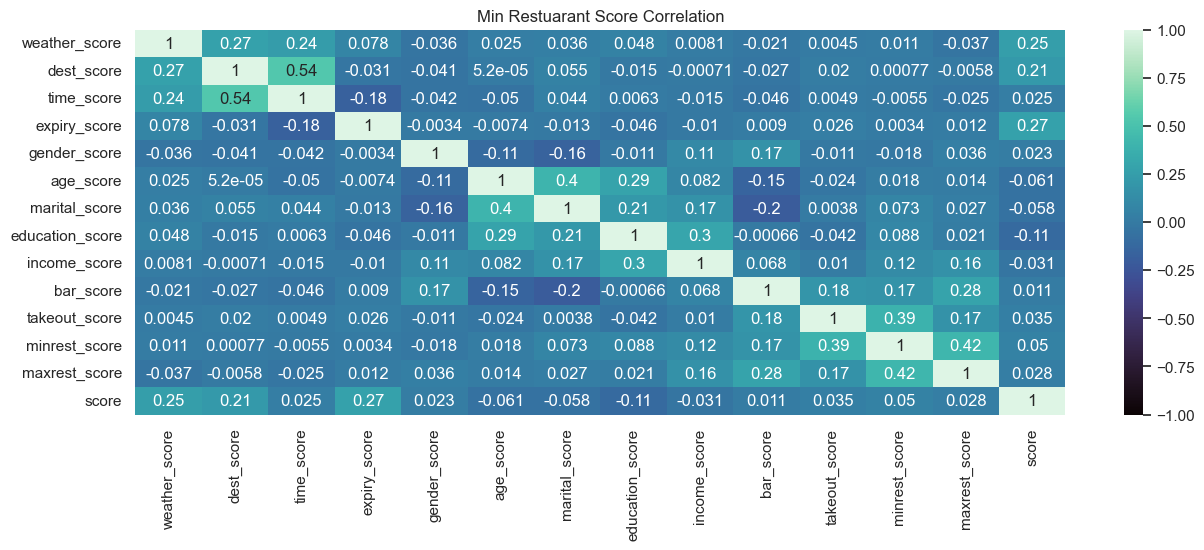

In [18]:
scores = ['weather_score', 'dest_score', 'time_score', 'expiry_score', 'gender_score', 'age_score', 'marital_score', 'education_score', 'income_score', 
          'bar_score', 'takeout_score', 'minrest_score', 'maxrest_score', 'score']
sns.set_theme(rc={'figure.figsize':(15,5)})
plt.title('Min Restuarant Score Correlation')
sns.heatmap(df_min_rest[scores].corr(), annot = True, vmin=-1, cmap='mako')

### Heatmap of scores (with specific occupations)
it's just ok

<Axes: title={'center': 'Min Restuarant Score Correlation'}>

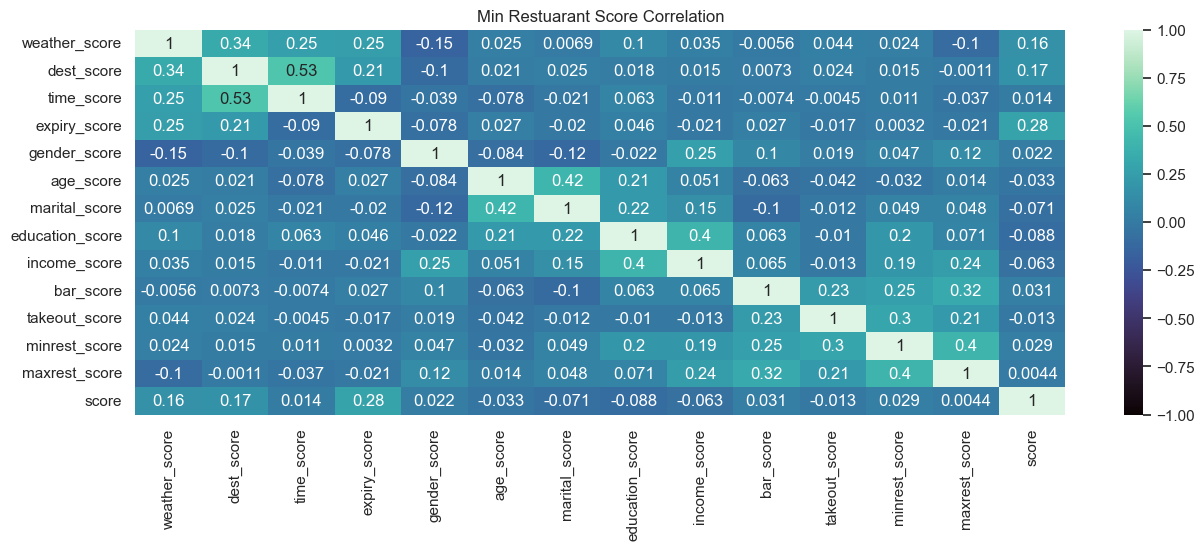

In [19]:
# df_min_rest.groupby('occupation').mean('Y').sort_values('Y', ascending=False)               # Protective Service (.89) Construction & Extraction (.89) Life Physical Social Science (.83)
# df_min_rest.groupby('destination').mean('Y').sort_values('Y')               # No Urgent Place (80%)
# df_min_rest.groupby('passanger').mean('Y').sort_values('Y')               # Friend(s) 80%, Kid(s) 72%, or Partner 77%

min_rest_occupations = ['Protective Service', 'Construction & Extraction', 'Life Physical Social Science', 'Sales & Related', 'Architecture & Engineering']
dinner_time = ['2PM', '6PM']
chart_data = df_min_rest[ (df_min_rest.occupation.isin(min_rest_occupations)) | (df_min_rest.destination=='No Urgent Place') & (df_min_rest.weather=='Sunny') & (df_min_rest.time.isin(dinner_time)) & (df_min_rest.expiration=='1d') ]
sns.set_theme(rc={'figure.figsize':(15,5)})
plt.title('Min Restuarant Score Correlation')
sns.heatmap(chart_data[scores].corr(), annot = True, vmin=-1, cmap='mako')

### Finding correlation with occupation
There are so many values that this is handled a little differently

Text(0.5, 1.0, 'Occupation vs. Coupon Acceptance Rate')

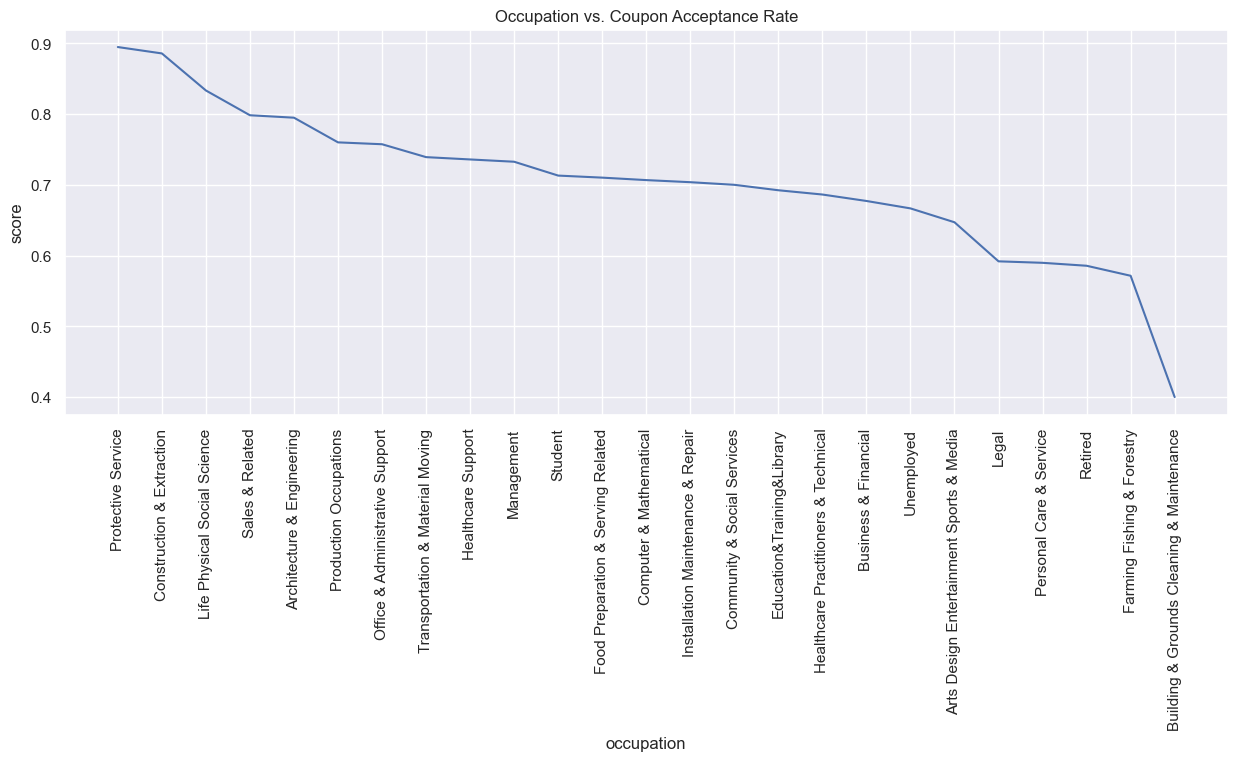

In [20]:
comparison = 'occupation'
chart_data = df_min_rest.groupby(comparison).mean('score').sort_values('score', ascending=False)
plt.xticks(rotation=90)
sns.lineplot(data=chart_data, x=comparison, y='score').set_title('Occupation vs. Coupon Acceptance Rate')

Text(0.5, 1.0, 'Occupation vs Income')

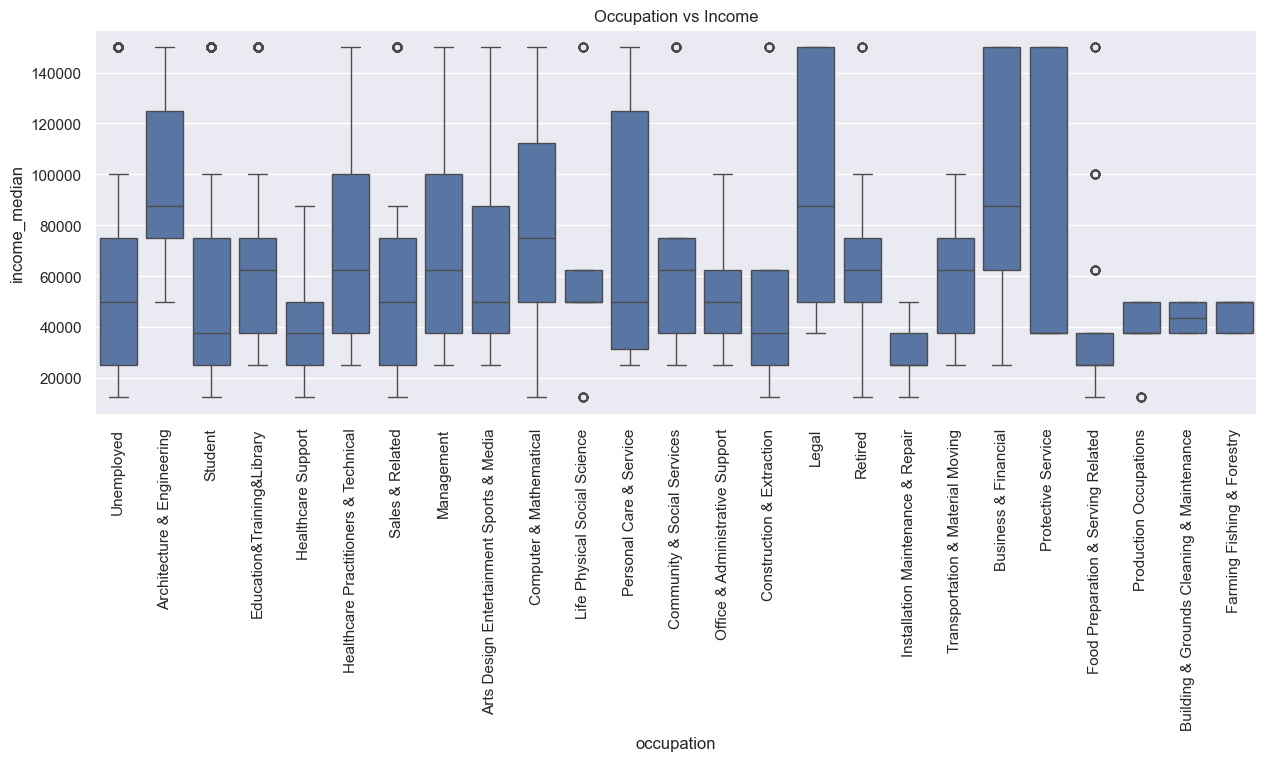

In [221]:
plt.xticks(rotation=90)
sns.boxplot(data=data, x='occupation', y='income_median').set_title('Occupation vs Income')

### Finding _positive_ correlation among categories
Which categories caused the acceptance rate to increase?

<Axes: xlabel='expiry_score', ylabel='score'>

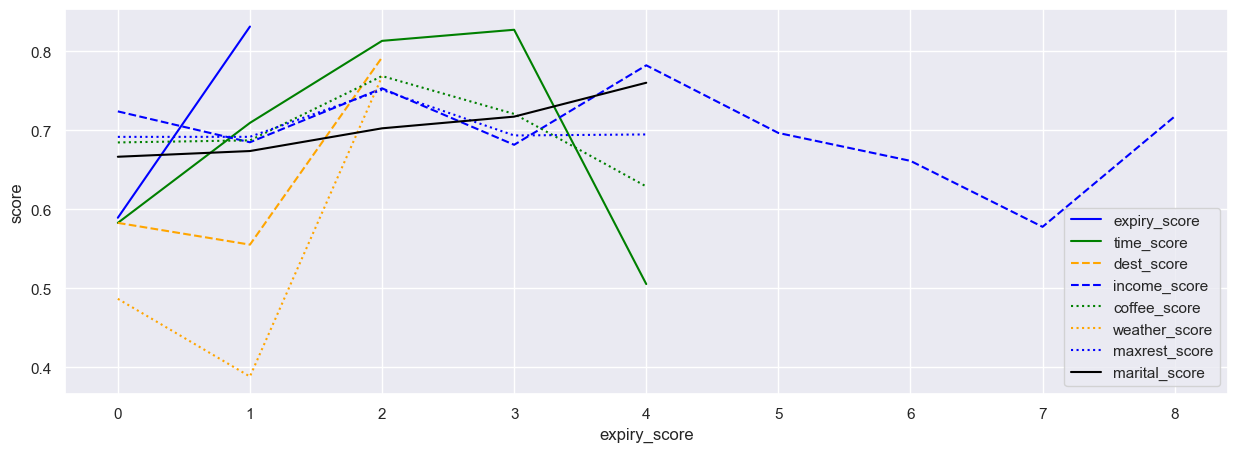

In [ ]:
# chart_data = data.groupby('occupation').mean('income_score')
# sns.lineplot(data=chart_data, y='income_score', x='occupation')
# plt.xticks(rotation=45)

comparison = 'expiry_score'
chart_data = df_min_rest.groupby(comparison).mean('score').sort_values(comparison, ascending=True)
sns.lineplot(data=chart_data, x=comparison, y='score', label='expiry_score', linestyle='solid', color='blue')
comparison = 'time_score'
chart_data = df_min_rest.groupby(comparison).mean('score').sort_values(comparison, ascending=True)
sns.lineplot(data=chart_data, x=comparison, y='score', label='time_score', linestyle='solid', color='green')

comparison = 'dest_score'
chart_data = df_min_rest.groupby(comparison).mean('score').sort_values(comparison, ascending=True)
sns.lineplot(data=chart_data, x=comparison, y='score', label='dest_score', linestyle='dashed', color='orange')
comparison = 'income_score'
chart_data = df_min_rest.groupby(comparison).mean('score').sort_values(comparison, ascending=True)
sns.lineplot(data=chart_data, x=comparison, y='score', label='income_score', linestyle='dashed', color='blue')
comparison = 'coffee_score'
chart_data = df_min_rest.groupby(comparison).mean('score').sort_values(comparison, ascending=True)
sns.lineplot(data=chart_data, x=comparison, y='score', label='coffee_score', linestyle='dotted', color='green')
comparison = 'weather_score'
chart_data = df_min_rest.groupby(comparison).mean('score').sort_values(comparison, ascending=True)
sns.lineplot(data=chart_data, x=comparison, y='score', label='weather_score', linestyle='dotted', color='orange')
comparison = 'maxrest_score'
chart_data = df_min_rest.groupby(comparison).mean('score').sort_values(comparison, ascending=True)
sns.lineplot(data=chart_data, x=comparison, y='score', label='maxrest_score', linestyle='dotted', color='blue')
comparison = 'minrest_score'
chart_data = df_min_rest.groupby(comparison).mean('score').sort_values(comparison, ascending=True)
sns.lineplot(data=chart_data, x=comparison, y='score', label='minrest_score', linestyle='solid', color='black')

In [244]:
df_min_rest.Y.value_counts(normalize=True) # records: 2786, acceptance rate: 71%

jobs = ['Protective Service', 'Construction & Extraction', 'Life Physical Social Science', 'Sales & Related', 'Architecture & Engineering']

df_min_rest[
        # 80% or higher
        (df_min_rest.expiry_score == 1) &     # 1 day, longest value
        (df_min_rest.time_score == 3) &       # 6pm
        # (df_min_rest.occupation.isin(jobs)) &      # likely occupations

        # # 75% or higher
        # (df_min_rest.dest_score == 2) &       # No Urgent Place
        # (df_min_rest.income_score == 4) &     # $50k - $62k
        # (df_min_rest.coffee_score == 2) &     # 1~3 times a month
        (df_min_rest.weather_score == 2) &    # Sunny
        (df_min_rest.maxrest_score == 2) &    # 1~3 times a month
        (df_min_rest.minrest_score == 4) &    # gt8
        
        # # 70% or higher
        # (df_min_rest.education_score == 2) &  # Some college - no degree
        # (df_min_rest.bar_score == 3) &        # 4~8 times a month
        # (df_min_rest.takeout_score == 0) &    # never
        # (df_min_rest.marital_score == 0) &    # Single
        (1 == 1)
    ].Y.value_counts(normalize=True) # 0.546512


Y
1    1.0
Name: proportion, dtype: float64

### Finding _negative_ correlation among categories
Which categories caused the acceptance rate to increase?

<Axes: xlabel='expiry_score', ylabel='score'>

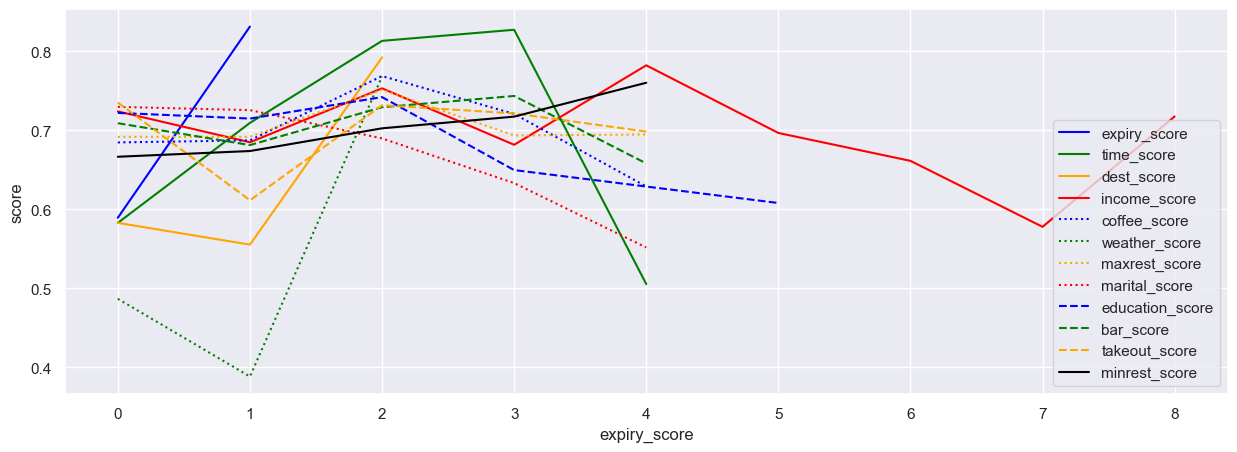

In [21]:
# chart_data = data.groupby('occupation').mean('income_score')
# sns.lineplot(data=chart_data, y='income_score', x='occupation')
# plt.xticks(rotation=45)

comparison = 'expiry_score'
chart_data = df_min_rest.groupby(comparison).mean('score').sort_values(comparison, ascending=True)
sns.lineplot(data=chart_data, x=comparison, y='score', label='expiry_score', linestyle='solid', color='blue')
comparison = 'time_score'
chart_data = df_min_rest.groupby(comparison).mean('score').sort_values(comparison, ascending=True)
sns.lineplot(data=chart_data, x=comparison, y='score', label='time_score', linestyle='solid', color='green')

comparison = 'dest_score'
chart_data = df_min_rest.groupby(comparison).mean('score').sort_values(comparison, ascending=True)
sns.lineplot(data=chart_data, x=comparison, y='score', label='dest_score', linestyle='solid', color='orange')
comparison = 'income_score'
chart_data = df_min_rest.groupby(comparison).mean('score').sort_values(comparison, ascending=True)
sns.lineplot(data=chart_data, x=comparison, y='score', label='income_score', linestyle='solid', color='red')
comparison = 'coffee_score'
chart_data = df_min_rest.groupby(comparison).mean('score').sort_values(comparison, ascending=True)
sns.lineplot(data=chart_data, x=comparison, y='score', label='coffee_score', linestyle='dotted', color='blue')
comparison = 'weather_score'
chart_data = df_min_rest.groupby(comparison).mean('score').sort_values(comparison, ascending=True)
sns.lineplot(data=chart_data, x=comparison, y='score', label='weather_score', linestyle='dotted', color='green')
comparison = 'maxrest_score'
chart_data = df_min_rest.groupby(comparison).mean('score').sort_values(comparison, ascending=True)
sns.lineplot(data=chart_data, x=comparison, y='score', label='maxrest_score', linestyle='dotted', color='orange')
comparison = 'marital_score'
chart_data = df_min_rest.groupby(comparison).mean('score').sort_values(comparison, ascending=True)
sns.lineplot(data=chart_data, x=comparison, y='score', label='marital_score', linestyle='dotted', color='red')
comparison = 'education_score'
chart_data = df_min_rest.groupby(comparison).mean('score').sort_values(comparison, ascending=True)
sns.lineplot(data=chart_data, x=comparison, y='score', label='education_score', linestyle='dashed', color='blue')
comparison = 'bar_score'
chart_data = df_min_rest.groupby(comparison).mean('score').sort_values(comparison, ascending=True)
sns.lineplot(data=chart_data, x=comparison, y='score', label='bar_score', linestyle='dashed', color='green')
comparison = 'takeout_score'
chart_data = df_min_rest.groupby(comparison).mean('score').sort_values(comparison, ascending=True)
sns.lineplot(data=chart_data, x=comparison, y='score', label='takeout_score', linestyle='dashed', color='orange')
comparison = 'minrest_score'
chart_data = df_min_rest.groupby(comparison).mean('score').sort_values(comparison, ascending=True)
sns.lineplot(data=chart_data, x=comparison, y='score', label='minrest_score', linestyle='solid', color='black')

# df_min_rest.columns[df_min_rest.columns.str.contains('score')]

In [249]:
df_min_rest.Y.value_counts(normalize=True) # records: 2786, acceptance rate: 71%

unlikely_occupations = ['Arts Design Entertainment Sports & Media', 'Legal', 'Personal Care & Service', 'Retired', 'Farming Fishing & Forestry', 'Building & Grounds Cleaning & Maintenance']

### order the categories - from greatest impact to least impact
df_min_rest[
        # 50% or lower
        (df_min_rest.weather_score == 1) &        # Rainy
        (df_min_rest.time_score == 4) &             # 10pm

        # 60% or lower
        # (df_min_rest.occupation.isin(jobs)) &          # Occupations
        # (df_min_rest.expiry_score == 0) &         # 2 hours        
        # (df_min_rest.dest_score == 1) &           # Home
        # (df_min_rest.marital_score == 4) &        # Widowed

        # # 70% or lower
        # (df_min_rest.education_score == 2) &      # Some college - no degree
        # (df_min_rest.takeout_score == 0) &        # never
        # (df_min_rest.coffee_score == 2) &         # 1~3 times a month
        (1 == 1)
    ].Y.value_counts(normalize=True) # 0.546512

Series([], Name: proportion, dtype: float64)